# Practice Session 4: Hypothesis Testing I

In [33]:
import pandas as pd
import numpy as np
from numpy.random import default_rng

import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, ttest_1samp, ttest_ind

import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
plt.rcParams["figure.figsize"] = (8, 8)

## Part 1: *t*-Distribution
Yesterday, we talked about the normal distribution and saw that roughly 95% of the area under the normal curve\
lies within $\mu \pm 1.96\sigma$ (that is, within approximately 1.96 standard deviations of the mean).\
We also saw that when we repeatedly drew samples and calculated their means, the histogram of those sample means looked bell-shaped.\
That was exactly the **Central Limit Theorem (CLT)** in action.\
Regardless of the original data’s distribution (as long as the observations are independent and identically distributed with finite variance):
- the sampling distribution of the mean $\bar{X}$ becomes approximately normal distribution as the sample size *n* grows,  
- centered at the true mean $\mu$,
- with a spread described by the **standard error**:\
 $\text{SE} = \frac{\sigma}{\sqrt{n}}$

So according to the CLT, the mean of samples follows approximately $\bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$ \
This in turn means that $\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0, 1)$

Based on the properties of the standard normal distribution and after a few algebraic steps we can write:
$P\left(\bar{X} - 1.96 \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} + 1.96 \frac{\sigma}{\sqrt{n}}\right) = 0.95$\
This result defines the **95% confidence interval** for the population mean $\mu$.

> It’s important to interpret this correctly:
> The 95% confidence level means that *if we repeated the sampling process many times*,
> about **95% of those intervals** would contain the true mean $\mu$.\
> So the confidence level refers to the **method’s reliability**, not the probability that $\mu$ lies inside one specific interval.


Let’s now connect this theory to a concrete example.

Yesterday, we considered a population that followed a normal distribution with a **mean of 10.0** and a **standard deviation of 1.8**, that is: $\mathcal{N}(10.0, 1.8^2)$

If we repeatedly draw random samples of size $n = 5$ from this population, the CLT tells us that the sample means will be approximately normally distributed as well:\
$\bar{X} \sim \mathcal{N}\left(10.0, \frac{1.8^2}{5}\right)$\
Based on this, we can use the formula derived above to construct a 95% confidence interval for the population mean:\
$\bar{X} \pm 1.96 \times \frac{1.8}{\sqrt{5}}$

So, if we were to repeat this sampling process many times, about **95% of the calculated intervals** would include the true mean value of **10.0**.

However, in real-world situations we typically **do not know** the true standard deviation $\sigma = 1.8$.\
Instead, we have to estimate it from the sample using the sample standard deviation ($s$).

If we now use this sample estimate in our formula for the 95% confidence interval, we would write: $\bar{X} \pm 1.96 \cdot \frac{s}{\sqrt{n}}$

Let’s check whether this version of the interval still captures the true mean about 95% of the time when the sample size is small ($n = 5$).

Let’s test this empirically by simulation.

We will:
1. Draw many samples (100000) of size $n = 5$ from $\mathcal{N}(10.0, 1.8^2)$.
2. For each sample, compute $\bar{X}$ and $s$.
3. Build the interval $\bar{X} \pm 1.96 \cdot \frac{s}{\sqrt{n}}$.
4. Check whether $\mu = 10.0$ falls inside.
5. Calculate the **coverage proportion** across all repetitions.

In [2]:
n = 5
number_of_simulations = 100000
true_mean = 10.0
true_std = 1.8

rng = np.random.default_rng(42) # reproducible results

# Generating number_of_simulations (100000) samples, each containing n (5) observations drawn from N(μ=10.0, σ=1.8)
# The result is a 2D array with shape (100000, 5), where each row is one simulated sample
samples = rng.normal(loc=true_mean, scale=true_std, size=(number_of_simulations, n))

In [3]:
# Calculating sample means and sample standard deviations
sample_means = samples.mean(axis=1)
sample_stds = samples.std(axis=1, ddof=1)

<Axes: ylabel='Density'>

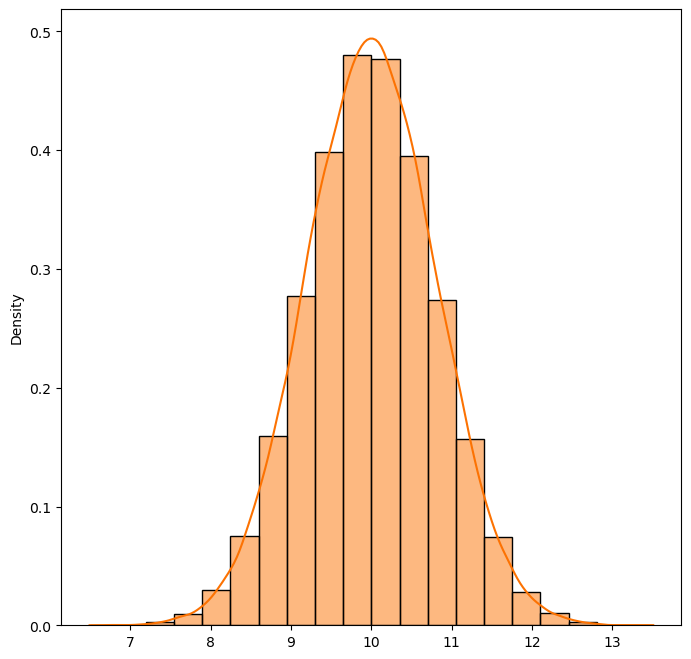

In [4]:
# Plotting the distribution of sample means
sns.histplot(sample_means, bins=20, kde=True, stat="density", color="#fc7202")

In [ ]:
# Constructing 95% intervals using sample means and sample standard deviations
lower_half = sample_means - 1.96 * (sample_stds / np.sqrt(n))
upper_half = sample_means + 1.96 * (sample_stds / np.sqrt(n))

# Checking the proportion of intervals that contain/cover the true mean mu
coverage = np.sum((lower_half <= true_mean) & (true_mean <= upper_half)) / number_of_simulations * 100
coverage

np.float64(87.691)

> *Alternative approach*:
> Instead of using vectorized `NumPy` operations, you could also check the proportion of confidence intervals that contain the true mean using a simple for loop:

In [6]:
# Checking the proportion of intervals that contain the true mean mu (alternative way)
counter = 0
for i in range(number_of_simulations):
    if lower_half[i] <= true_mean:
        if true_mean <= upper_half[i]:
            counter += 1

counter / number_of_simulations * 100

87.691

> <font color='#fc7202'>**ADDITIONAL NOTES!**</font>
>
> If we want to generate reproducible results using a random seed, we have to be careful how we do it.\
> The example below would be incorrect if we want to generate several random samples with n measurements each,\
> because we are re-initializing the random number generator with same seed inside the loop every time.

In [17]:
for i in range(3):
    rng = np.random.default_rng(42) # re-seeding with the SAME seed each time
    samples_ex = rng.normal(loc=true_mean, scale=true_std, size=n)
    print(samples_ex) # prints the SAME sample 3 times

[10.54849074  8.12802861 11.35081215 11.69301649  6.48813666]
[10.54849074  8.12802861 11.35081215 11.69301649  6.48813666]
[10.54849074  8.12802861 11.35081215 11.69301649  6.48813666]


> If you want to use a `for` loop, you should initialize the random number generator only once, before the loop:

In [22]:
rng = np.random.default_rng(42) # initialize once
for i in range(3):
    samples_ex = rng.normal(loc=true_mean, scale=true_std, size=n)
    print(samples_ex) # prints 3 different samples

[10.54849074  8.12802861 11.35081215 11.69301649  6.48813666]
[ 7.65607689 10.23011273  9.43076333  9.96975792  8.46452093]
[11.58291635 11.40002548 10.11885526 12.02903417 10.84151682]


> Or, if you prefer to define it inside the loop, then use a different seed each time to make the samples independent:

In [10]:
for i in range(3):
    rng = np.random.default_rng(i) # re-seeding with a DIFFERENT seed each time
    samples_ex = rng.normal(loc=true_mean, scale=true_std, size=n)
    print(samples_ex) # prints 3 different samples

[10.2263144   9.76221125 11.15276077 10.18882021  9.03579513]
[10.62205155 11.47891266 10.59478674  7.65431698 11.62964056]
[10.34029609  9.05905281  9.25648562  5.60535871 13.23947329]


As we see, the coverage is lower - only about **88%**, not 95%.  So, why does this happen?

In our simulation, the population standard deviation $\sigma$ was **unknown**, so we estimated it using the sample standard deviation $s$.\
When the sample size $n$ is **large**, this substitution has very little effect - the sampling distribution of the statistic
$\frac{\bar{X} - \mu}{s / \sqrt{n}}$ remains approximately **standard normal**.  
This gives us the familiar large-sample confidence interval for the mean: $\bar{X} \pm z_{\alpha/2} \frac{s}{\sqrt{n}}$,\
which is valid for sufficiently large samples (usually $n \ge 30\text{–}40$), regardless of the exact shape of the population distribution  

However, when the **sample size is small**, replacing $\sigma$ with $s$  adds noticeable **extra variability**.  
The statistic above is no longer normally distributed, and using the standard normal critical value $z_{\alpha/2}=1.96$
produces confidence intervals that are **too narrow** - as we just observed.

To account for this additional uncertainty, we use a different reference distribution: the [**Student’s *t*-distribution**](https://onlinestatbook.com/2/estimation/t_distribution.html).

#### The *t*-distribution

The *t*-distribution was developed in [1908 by William Sealy Gosset](https://seismo.berkeley.edu/~kirchner/eps_120/Odds_n_ends/Students_original_paper.pdf), a statistician working at the Guinness Brewery in Dublin.  
Because his employer required anonymity, he published under the pseudonym **“Student”**, hence the name **Student’s *t*-distribution**.

The *t*-distribution applies when:
- the underlying population is approximately normal,
- the sample size $n$ is small,
- and the population standard deviation $\sigma$ is unknown and estimated by $s$.

It is **symmetric** like the normal distribution, but has **heavier tails**, reflecting the extra uncertainty from estimating $\sigma$.  
The exact shape depends on the **degrees of freedom** ($\text{df} = n - 1$).  
As the sample size increases, the *t*-distribution gradually approaches the **standard normal**.

Let’s visualize this next to see how the *t*-distribution compares to the normal distribution for different sample sizes.


In [11]:
# x values for the density plot
x = np.linspace(-5, 5, 400)

# Standard normal PDF (fixed)
normal_pdf = norm.pdf(x)

def plot_t_vs_normal(df=4):
    """Plot the t-distribution for a given df compared to the standard normal."""
    t_pdf = t.pdf(x, df)
    
    plt.figure(figsize=(7, 4))
    plt.plot(x, normal_pdf, 'k--', lw=2, label='Normal (Z)')
    plt.plot(x, t_pdf, color='#00bf63', lw=2, label=f't-distribution (df={df})')
  
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.ylim(0, 0.45)
    plt.show()

# Interactive slider for df
interact(plot_t_vs_normal, df=IntSlider(min=1, max=100, step=1, value=4, description='df'));

interactive(children=(IntSlider(value=4, description='df', min=1), Output()), _dom_classes=('widget-interact',…

> As we can see, both curves are symmetric and centered at zero, but the *t*-distribution has heavier tails.  
> This means that extreme values are more likely - reflecting the extra uncertainty when estimating the standard deviation from a small sample.
>
> As the degrees of freedom increase (df = 10, 30, ...), the *t*-curve gradually approaches the standard normal.  
> For large samples (roughly $n > 30$), the difference becomes negligible.


#### <font color='#fc7202'>Task 1:</font>

In the previous simulation, we saw that using the normal critical value (1.96) with a small sample size ($n = 5$) gave us coverage of only about **88%**, not 95%.  
Now, let’s see if using the *t*-distribution instead fixes the problem.

1. Repeat the same simulation as before - draw many samples of size $n = 5$ from  $\mathcal{N}(10.0, 1.8^2)$.
2. For each sample:
   - Compute the sample mean ($\bar{X}$) and the sample standard deviation ($s$).
   - Construct a 95% confidence interval using the *t*-distribution:\
     $\bar{X} \pm t_{0.975,\,df} \times \frac{s}{\sqrt{n}}$,
     where $df = n - 1$.
3. Check in how many of these intervals the true mean $\mu = 10.0$ falls.
4. Compute the coverage proportion (should be close to 0.95).

> *Hint:*
> You can get the correct *t*-critical value ($t_{0.975, df}$) using `SciPy`:
> ```python
> df = n - 1
> t_crit = t.ppf(0.975, df)   # 0.975 corresponds to the upper tail for a 95% CI
> ```

> We already have our samples, as well as their corresponding means and standard deviations, calculated in the previous part.\
> Therefore, we can now directly construct the new confidence intervals using the *t*-distribution.\
> To do this, we first need to compute the degrees of freedom and then find the critical *t*-value based on the formula given above:

In [14]:
df = n - 1 #degrees of freedom
t_crit = t.ppf(0.975, df)  # two-tailed 95% CI critical value

> *Note:*\
> `.ppf()` stands for percent point function, which is the inverse of the cumulative distribution function (CDF).\
> In other words, `t.ppf(p,df)` returns the *t*-value (critical value) such that the area to the left of that value\
> under the *t*-distribution curve equals *p*-value.
>
> <font color='#fc7202'>**ADDITIONAL NOTES!**</font>
>
> Below are three figures, PDF, CDF, and PPF, shown side by side.\
> They illustrate how these functions are related and how we obtain the critical value using `t.ppf(p=0.975, df=4)`.\
> In the PDF, the green-shaded area represents the lower 97.5% of probability under the *t*-curve.\
> On the CDF, this corresponds to a cumulative probability of 0.975 at the same *t*-value.\
> Finally, the PPF plot shows the inverse relationship: for a given probability (*p* = 0.975),\
> it returns the corresponding t-value (the red dashed line), which is our critical value.

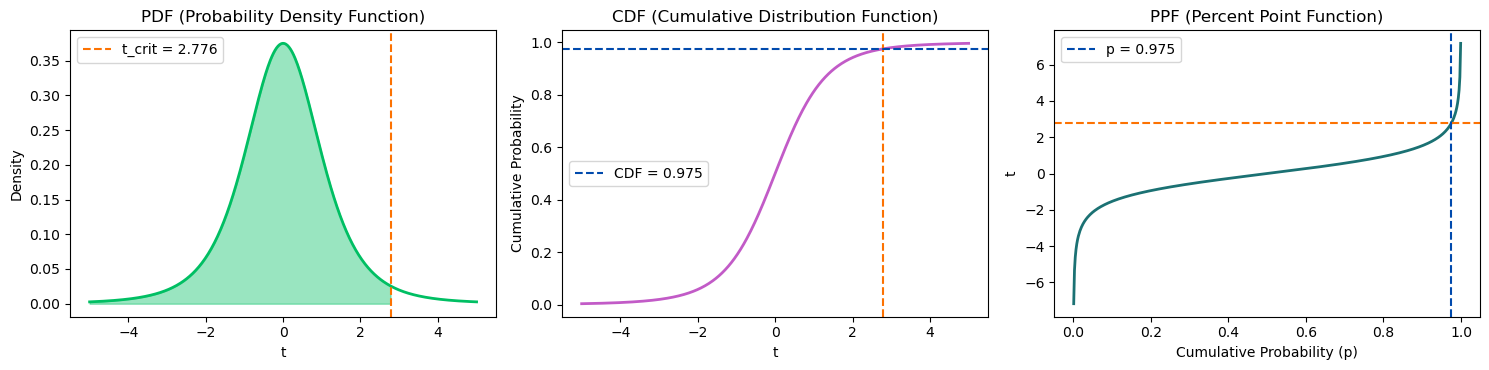

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PDF (Probability Density Function)
axes[0].plot(x, t.pdf(x, df), color='#00bf63', lw=2)
axes[0].fill_between(x, 0, t.pdf(x, df), where=(x <= t_crit), color='#00bf63', alpha=0.4)
axes[0].axvline(t_crit, color='#fc7202', ls='--', label=f"t_crit = {t_crit:.3f}")
axes[0].set_title("PDF (Probability Density Function)")
axes[0].set_xlabel("t")
axes[0].set_ylabel("Density")
axes[0].legend()

# CDF (Cumulative Distribution Function)
axes[1].plot(x, t.cdf(x, df), color='#c25bc7', lw=2)
axes[1].axvline(t_crit, color='#fc7202', ls='--')
axes[1].axhline(p, color='#004aad', ls='--', label=f"CDF = {p}")
axes[1].set_title("CDF (Cumulative Distribution Function)")
axes[1].set_xlabel("t")
axes[1].set_ylabel("Cumulative Probability")
axes[1].legend()

# PPF (Percent Point Function)
p_values = np.linspace(0.001, 0.999, 500)
axes[2].plot(p_values, t.ppf(p_values, df), color='#1b7173', lw=2)
axes[2].axhline(t_crit, color='#fc7202', ls='--')
axes[2].axvline(p, color='#004aad', ls='--', label=f"p = {p}")
axes[2].set_title("PPF (Percent Point Function)")
axes[2].set_xlabel("Cumulative Probability (p)")
axes[2].set_ylabel("t")
axes[2].legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
# Constructing 95% intervals using sample means and sample standard deviations (t-distribution)
lower_half_t = sample_means - t_crit * (sample_stds / np.sqrt(n))
upper_half_t = sample_means + t_crit * (sample_stds / np.sqrt(n))

np.sum((lower_half_t <= true_mean) & (true_mean <= upper_half_t)) / number_of_simulations * 100

np.float64(94.97)

> You should now see a **coverage** very close to **0.95** (typically around 0.949 - 0.952 depending on random seed).\
> This confirms that using the *t*-distribution instead of the normal distribution correctly adjusts for the additional uncertainty from estimating $\sigma$ with $s$.\
> As the sample size $n$ increases, the *t*-distribution approaches the normal distribution, and both methods yield almost identical results.


*You might be wondering now, why are we spending so much time on t-distribution when today’s topic is **Hypothesis Testing**?*\
*The t-distribution forms the basis of the t-test, which we’ll start exploring next.*


## Part 2: Introduction to Statistical Inference and Hypothesis Testing

By *inference*, we refer to a formal process of drawing conclusions from data.  
The goal of statistical inference is to reach conclusions that are supported by evidence, not merely by observation or intuition.  
In statistics, evidence arises through the careful and reasoned application of statistical methods and the evaluation of probabilities.

To carry out a **hypothesis test**, we always begin with a **question** - what do we want to find out from our data?

---

Once the research question is clear, the **frequentist framework** guides us through  a formal and reproducible sequence of steps:

1. **Formulate the hypotheses**  
   We express the research question as two competing statements:  
   - **Null hypothesis ($H_0$)** - assumes there is **no real effect or difference**, and any variation we observe is due to **random chance**.  
   - **Alternative hypothesis ($H_1$)** - represents the claim that there **is** a real effect or that the parameter differs from the value stated in $H_0$.
   
   These two statements must cover **all possibilities** and be **mutually exclusive**.\
   It’s important to note that we can **never prove $H_0$ to be true** - we can only **fail to reject it** based on the available data.  
   Statistical tests are designed to look for **sufficient evidence to reject $H_0$**, not to confirm it.

2. **Establish the test statistic (and its null distribution)**  
   Identify which **test statistic** will be used to compare $H_0$ and $H_1$.  
   This choice depends on:
   - the **type of data** (e.g., means, proportions, variances),  
   - the **experimental design** (e.g., one-sample, independent two-sample, paired), and  
   - what is **known about the population** (e.g., whether the population standard deviation $\sigma$ is known).  

   Under the null hypothesis, this statistic follows a **known reference (sampling) distribution**, such as the  *z*, *t*, *χ²*, or *F* distribution.

3. **Set the decision rule (choose $\alpha$ and define rejection criteria)**  
   Next, define the rule for deciding when to reject $H_0$:  
   - Choose the **significance level** $\alpha$, which represents the probability of making a *Type I error* (rejecting a true $H_0$).  
     The most common choice is **$\alpha = 0.05$**, but stricter values (e.g., 0.01) may be used in sensitive applications.  
   - Using the null distribution, determine the **critical value(s)** that define the **rejection region** -  
     the range of test statistic values that would be considered unlikely if $H_0$ were true.  
   - *Equivalent p-value approach:* reject $H_0$ if the computed ***p*-value** ≤ **α** (adjusted for one- or two-tailed tests).

4. **Collect data, compute the test statistic, and compare**  
   Gather the sample data and calculate the observed value of the chosen test statistic.  
   Compare this value with the **critical region** (or use the *p*-value approach):  
   - If the test statistic falls inside the rejection region or if *p* ≤ *α*, → **Reject $H_0$**.  
   - Otherwise, → **Fail to reject $H_0$**.

5. **Interpret the result in context**  
   A statistical result only has meaning when connected back to the original question.  
   - Clearly report whether $H_0$ was rejected or not, and **what that implies about the research question**.  
   - Remember: “Failing to reject $H_0$” does *not* prove that $H_0$ is true - it simply means there was **not enough evidence** to conclude otherwise.  
   - Whenever possible, complement the test result with **effect sizes** and **confidence intervals** to provide a fuller picture of the findings.
---

#### One-Tailed or Two-Tailed Tests
Based on how we formulate our hypotheses, a test can be **one-tailed** or **two-tailed**.  
- If the alternative hypothesis states only that the parameter is *different* from the null value ($H_1\!:\,\mu \ne \mu_0$), the test is **two-tailed**,\
and the significance level $\alpha$ is divided equally between both tails of the distribution.  
- If the alternative specifies a *direction* of difference ($H_1\!:\,\mu > \mu_0$ or $H_1\!:\,\mu < \mu_0$), the test is **one-tailed**, and the entire $\alpha$ lies in a single tail.  

This choice must be made **before** the analysis and should always reflect the research question.


#### Type I and Type II Errors

When we make decisions based on sample data, there are **two kinds of mistakes** we can make.
These are called **Type I** and **Type II** errors.

Whenever we perform a hypothesis test, there are two possible *truths* (whether $H_0$ is true or false) and two possible *decisions* (whether we reject $H_0$ or not).  
The four combinations lead to the following outcomes:

| **Null hypothesis ($H_0$) is ...**| **True** | **False** |
|-------------------------|----------------|-----------------|
| **Rejected** | ❌ **Type I error** (false positive) | ✅ **Correct decision** (true positive) |
| **Failed to reject** | ✅ **Correct decision** (true negative) | ❌ **Type II error** (false negative) |

- **Type I error (α):**  
  Occurs when we *reject a true null hypothesis*.  
  In other words, we detect an effect that **does not actually exist**.  
  The probability of making this error is the **significance level**,  
  typically $\alpha = 0.05$ (5%).

- **Type II error (β):**  
  Occurs when we *fail to reject a false null hypothesis*.  
  In other words, we **miss a real effect** that does exist.  
  The probability of this mistake is denoted by **β**.

- **Power of a test (1 − β):**  
  The probability of correctly rejecting a false $H_0$.  
  A more *powerful* test has a smaller chance of missing true effects.

**How to interpret α and β**
- The smaller the **α**, the less likely we are to make a **Type I error**, but the harder it becomes to detect true effects (increasing **β**).  
- Conversely, increasing **α** makes it easier to find effects (reducing **β**), but increases the risk of false positives.  
- Therefore, α and β are **interconnected** - lowering one usually raises the other.

In practice, we choose α (e.g., 0.05) before testing, and aim to design studies with high **power** (often ≥ 0.8), to minimize the risk of both errors as much as possible.

![errors](https://www.researchgate.net/publication/361295532/figure/fig2/AS:11431281100133326@1669325756681/The-relationship-between-a-type-I-error-alpha-and-a-type-II-error-beta-Note.png)


> But the main question in practice is often: **how do we choose the right statistical test?**  
> Thanks to Matt, we have a helpful guideline image that summarizes this decision process.  
> Today, we’ll focus on one of the most common tests from that chart - the ***t*-test**.
![what_test](https://raw.githubusercontent.com/RaHub4AI/MI7032/refs/heads/main/Pictures/Hypothesis%20Testing%20Key%202023.png)


#### Putting Theory into Practice

Let’s now put all this theory into practice.  
We’ll start with one of the most widely used tools in data analysis - the ***t*-test**.

The *t*-test allows us to compare **means** and decide whether any observed difference is **statistically significant** or simply due to random variation.

Depending on the question we want to answer, there are three main types of *t*-tests:

1. **One-sample *t*-test**  
   Used to compare the **mean of a single sample** against a **known or reference value**.  
   Statistic: $t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}$, where:  
      - $\bar{X}$ = sample mean  
      - $\mu_0$ = hypothesized (reference) mean  
      - $s$ = sample standard deviation  
      - $n$ = sample size  

      *Example:* Testing whether the mean concentration measured in a reference material differs from the certified value.

2. **Independent two-sample *t*-test**
   Used to compare the **means of two independent groups**  (e.g., two different treatments or populations).\
   Statistic: $t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$, where:
   - $s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$ is the **pooled standard deviation**, and
   - $n_1$, $n_2$, $s_1$, $s_2$ are the sample sizes and standard deviations of the two groups.

   *Example:* Comparing the average pollutant concentration in two different rivers.

3. **Paired-sample (dependent) *t*-test**\
   Used when the two samples are **related**, for example, measurements taken **before and after** a treatment on the same individuals.\
   Statistic: $t = \frac{\bar{D}}{s_D / \sqrt{n}}$, where:  
      - $\bar{D}$ = mean of the differences between paired observations  
      - $s_D$ = standard deviation of the differences  
      - $n$ = number of pairs  

   *Example:* Temperature measurements made at the same time, but different locations


In the next step, we’ll begin with the simplest case - the **one-sample *t*-test** - to test whether our measured mean differs significantly from a known reference value.

#### <font color='#fc7202'>Task 2: </font>
You purchase a **certified reference material (CRM)** for *lead (Pb)* concentration in rainwater. According to **NIST**, the certified concentration is **190 ng/L**.\
You analyze this reference sample **ten times** using your instrument and obtain the following results (in ng/L):
$187,\; 171,\; 191,\; 176,\; 196,\; 181,\; 189,\; 190,\; 185,\; 189$

1. Test whether your measurements **differ** from the certified value at the **95% confidence level**.
2. Test whether your measurements are **significantly lower** than the certified value  
   at the **95% confidence level**.

> *Hints:*
> Start by clearly stating your hypotheses ($H_0$ and $H_1$).   
> Check the assumptions of the one-sample *t*-test:  
>    - The data are independent.  
>    - The measurements come from an approximately normal distribution (you can visualize or test this).
>
> To perform the test, you can use the built-in function `scipy.stats.ttest_1samp()`.

- **Null hypothesis ($H_0$):**  
  The true mean lead concentration measured by the instrument is equal to the certified reference value.  
  <font color='#00bf63'>*$H_0\!:\,\mu = 190$*</font>

- **Alternative hypothesis ($H_1$):**  
  The true mean lead concentration measured by the instrument differs from the certified reference value.  
  <font color='#00bf63'>*$H_1\!:\,\mu \neq 190$*</font> 
	​



In [18]:
# Creating DataFrame with 10 measurements of lead concentration (ng/L)
# Each row represents one sample (sample_id) and its corresponding measured value.
lead_df = pd.DataFrame({'sample_id': np.arange(1, 11),
                        'lead_concentration': [187, 171, 191, 176, 196, 181, 189, 190,185, 189]})
lead_df

,sample_id,lead_concentration
0,1,187
1,2,171
2,3,191
3,4,176
4,5,196
5,6,181
6,7,189
7,8,190
8,9,185
9,10,189


Before running a *t*-test, we should check the **normality assumption** for this small sample.  
Let’s (i) visualize the data and (ii) run the Shapiro–Wilk test, which is suitable for small samples.  
The Shapiro–Wilk null hypothesis is that the data are normally distributed.  
We’ll use a significance level of *α* = 0.05: if the *p*-value < 0.05, we have evidence against normality.


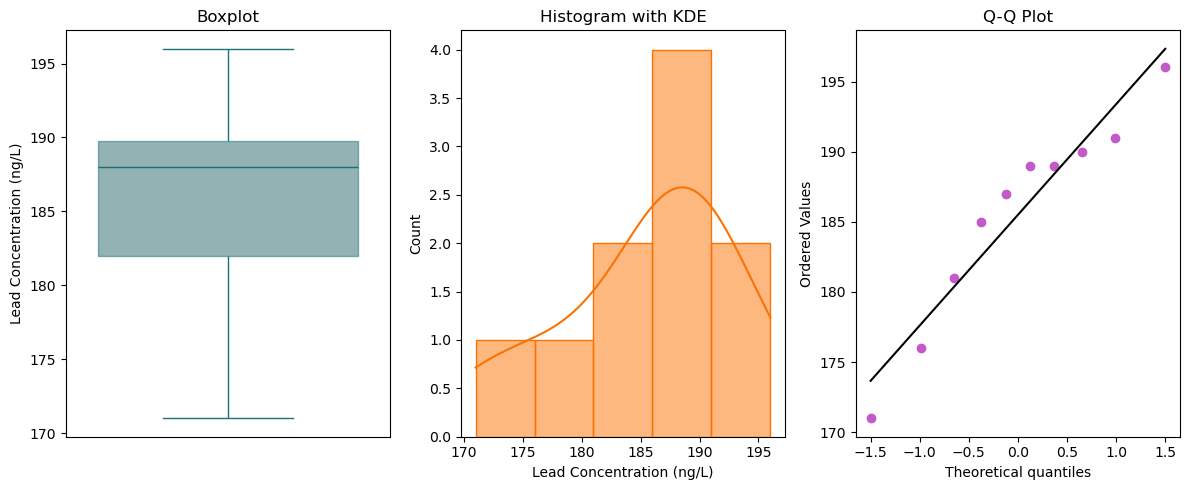

In [19]:
# Visualizing the lead concentration data using boxplot, histogram with KDE, and Q-Q plot
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y='lead_concentration', data=lead_df, linecolor='#1b7173', color='#1b7173',  boxprops=dict(alpha=.5), ax=axes[0])
axes[0].set_xticks([])
axes[0].set_ylabel('Lead Concentration (ng/L)')
axes[0].set_title('Boxplot')

sns.histplot(x='lead_concentration', data=lead_df, kde=True, color='#fc7202', edgecolor='#fc7202', ax=axes[1])
axes[1].set_xlabel('Lead Concentration (ng/L)')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram with KDE')

stats.probplot(lead_df['lead_concentration'], dist="norm", plot=axes[2])
axes[2].get_lines()[0].set_markerfacecolor('#c25bc7')   # color of the points
axes[2].get_lines()[0].set_markeredgecolor('#c25bc7')
axes[2].get_lines()[1].set_color('black')             # color of the reference line
axes[2].set_title("Q-Q Plot")
plt.tight_layout()

In [5]:
# Performing the Shapiro-Wilk test for normality on the lead concentration data
statistic_SW, p_value_SW = stats.shapiro(lead_df['lead_concentration'])
print(f'Shapiro-Wilk test statistic: {statistic_SW:.4f}, p-value: {p_value_SW:.4f}')

Shapiro-Wilk test statistic: 0.9327, p-value: 0.4749


Even though the plots (especially the Q-Q plot) suggest the data are not perfectly normal, the Shapiro-Wilk test gives *p* = 0.4749.\
With *α*=0.05, we fail to reject the null hypothesis of normality.\
We will therefore proceed under the normality assumption and conduct a one-sample *t*-test.\
(*Note: with small samples, mild visual deviations are common; the *t*-test is reasonably robust when normality is not strongly violated.*)

> *Recall:* The goal is to test whether your measurements differ from the certified value (190 ng/L) at the 95% confidence level.

In [6]:
ttest_1samp(lead_df.lead_concentration, popmean=190, alternative='two-sided')

TtestResult(statistic=np.float64(-1.8931642286025205), pvalue=np.float64(0.09087564736563374), df=np.int64(9))

In [21]:
confidence_level = 0.95
alpha = 1 - confidence_level
population_mean = 190

# Performing a one-sample t-test to compare the sample mean to the population mean of 190 ng/L
t_statistic_two_tailed, p_value_two_tailed = ttest_1samp(lead_df['lead_concentration'], popmean=population_mean, alternative='two-sided')
print(f't-statistic: {t_statistic_two_tailed:.4f}, p-value: {p_value_two_tailed:.4f}')

t-statistic: -1.8932, p-value: 0.0909


> To better understand what these results mean, let’s visualize the *t*-test.\
> We’ll plot the *t*-distribution with the appropriate degrees of freedom, highlight the critical regions for *α*=0.05,\
> and mark where our observed *t*-statistic falls on the curve.

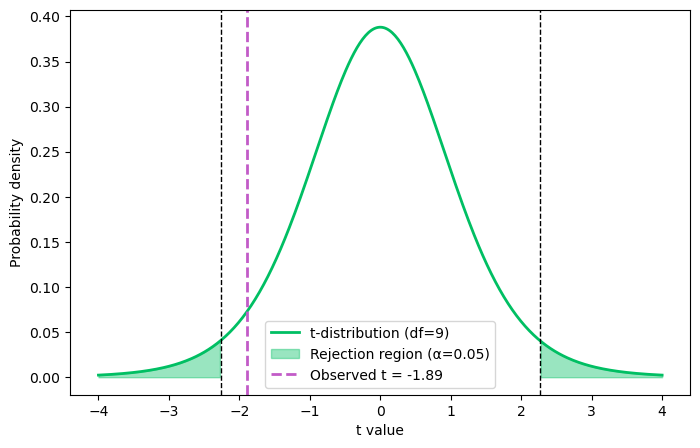

In [8]:
df = len(lead_df) - 1  # degrees of freedom

# Range for t-distribution
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df) # t-distribution PDF

# Critical t-value for two-tailed test
t_crit_two_tailed = t.ppf(1 - alpha/2, df)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color='#00bf63', lw=2, label=f"t-distribution (df={df})")

# Shade rejection regions
plt.fill_between(x, y, 0, where=(x <= -t_crit_two_tailed), color='#00bf63', alpha=0.4)
plt.fill_between(x, y, 0, where=(x >= t_crit_two_tailed), color='#00bf63', alpha=0.4, label="Rejection region (α=0.05)")

# Mark observed t-statistic
plt.axvline(t_statistic_two_tailed, color='#c25bc7', lw=2, ls='--', label=f"Observed t = {t_statistic_two_tailed:.2f}")
plt.axvline(-t_crit_two_tailed, color='black', lw=1, ls='--')
plt.axvline(t_crit_two_tailed, color='black', lw=1, ls='--')

plt.xlabel("t value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


> In this plot, the green curve is the *t*-distribution with `df=9`.\
> The shaded areas show the rejection regions for a two-tailed test at *α* = 0.05.\
> Our observed *t*-statistic (purple/pink dashed line) lies outside these critical regions, meaning the result is not statistically significant (*p* ≈ 0.09 > 0.05).\
> In plain terms: the probability of obtaining data this extreme under the null hypothesis is about 0.09 (roughly 1 in 10).\
> Since this probability is greater than 0.05, we fail to reject the null hypothesis at the 95% confidence level.

> *Recall:* The second question asks whether your measurements are significantly lower than the certified value (190 ng/L)
at the 95% confidence level.
>
> In this case, we perform a one-tailed *t*-test, because we are only interested in testing one direction of difference - whether the sample mean is less than the reference value.\
> A one-tailed test places the entire significance level (*α*=0.05) in one tail of the *t*-distribution (the lower tail, in this case).\
> This makes it slightly easier to detect a difference in the specified direction (but it does not test for higher values only for whether the mean is significantly smaller than 190 ng/L.)

- **Null hypothesis ($H_0$):**  
  The true mean lead concentration measured by the instrument is *equal to or greater than* the certified reference value.  
  <font color='#00bf63'>*$H_0\!:\,\mu\ge 190$*</font>

- **Alternative hypothesis ($H_1$):**  
  The true mean lead concentration measured by the instrument is *less than* the certified reference value.\
  <font color='#00bf63'>*$H_1\!:\,\mu < 190$*</font> 
	


In [9]:
# Performing a one-sample t-test for the one-tailed hypothesis (mean < 190)
t_statistic_one_tailed, p_value_one_tailed = ttest_1samp(lead_df['lead_concentration'], popmean=population_mean, alternative='less')
print(f't-statistic: {t_statistic_one_tailed:.4f}, p-value: {p_value_one_tailed:.4f}')

t-statistic: -1.8932, p-value: 0.0454


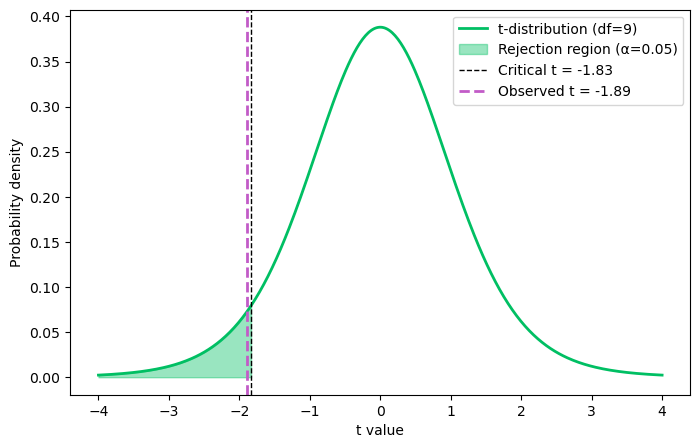

In [90]:
t_crit_one_tailed = t.ppf(alpha, df)  # critical value for left-tailed test

# Generate t-distribution values
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, color="#00bf63", lw=2, label=f"t-distribution (df={df})")

# Shade rejection region (left tail)
plt.fill_between(x, y, where=(x <= t_crit_one_tailed), color="#00bf63", alpha=0.4, label="Rejection region (α=0.05)")

# Mark the critical value and observed t-statistic
plt.axvline(t_crit_one_tailed, color="black", linestyle="--", lw=1, label=f"Critical t = {t_crit_one_tailed:.2f}")
plt.axvline(t_statistic_one_tailed, color="#c25bc7", linestyle="--", lw=2, label=f"Observed t = {t_statistic_one_tailed:.2f}")

# Labels
plt.xlabel("t value")
plt.ylabel("Probability density")
plt.legend()
plt.show()

> In this plot, the green curve represents the *t*-distribution with 9 degrees of freedom.\
> The shaded area shows the rejection region for a one-tailed test at *α* = 0.05 (left side).\
> The purple dashed line marks our observed *t*-statistic.\
> Since the observed *t* (–1.89) falls inside the rejection region (*t* < –1.833), we reject the null hypothesis.\
> This decision is also confirmed by the *p*-value (*p* ≈ 0.045), which is smaller than *α* (0.05).\
> Therefore, we conclude that the mean measured lead concentration is significantly lower than 190 ng/L at the 95% confidence level.
>
> But notice something important - the *p*-value is now exactly half of what it was in the two-tailed test!\
> Why? Because we decided after seeing the data to test in only one direction.\
> This is an example of *p*-hacking, where the test is chosen post-hoc to make results appear significant.\
> <font color='#fc7202'>**Statistically, this is not valid - hypotheses and test direction must be defined before analyzing the data!**</font>

![p_hacking](https://imgs.xkcd.com/comics/significant.png)

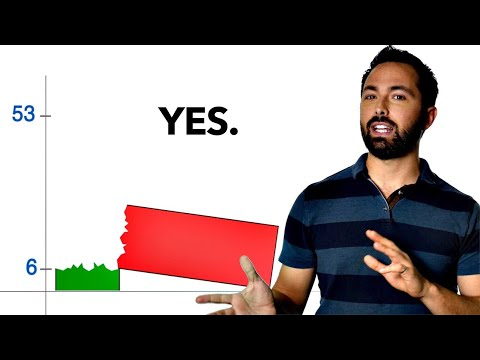

In [105]:
from IPython.display import YouTubeVideo

# Video ID is the part after "v=" in the URL
YouTubeVideo("42QuXLucH3Q", start=73, width=560, height=315)


When we perform **many hypothesis tests** on the same or related data, we face a serious problem:  
the more tests we do, the higher the chance of finding something “significant” **just by random chance**.

**Why is multiple testing a problem?**

When we test many different hypotheses on the same dataset, the probability of making at least one **Type I error (false positive)** increases rapidly.

Let’s assume:
- All $M$ hypotheses are **independent**.
- For each test, the null hypothesis is **true**.
- The probability of making a Type I error in a single test is $\alpha$, so the probability of *not* making an error is $1 - \alpha$.

The probability of making **no errors in any** of the $M$ tests is therefore: $P(\text{no false positives}) = (1 - \alpha)^M$\
Consequently, the probability of making **at least one Type I error** across all tests is: $P(\text{at least one false positive}) = 1 - (1 - \alpha)^M$\
This value grows quickly as $M$ increases. For example, if we set $\alpha = 0.01$ and perform $M = 100$ tests:\
$P(\text{at least one false positive}) = 1 - (1 - 0.01)^{100} \approx 0.63$\
So, even when all null hypotheses are true, there is still a **63% chance** that at least one test will incorrectly appear significant.

**The Bonferroni Correction**

If our goal is to keep the overall probability of a Type I error below a chosen level $\alpha$ across all $M$ tests, we can adjust the individual significance threshold.\
According to the **Bonferroni correction**, each test should use a stricter significance level: $\alpha_{\text{individual}} = \frac{\alpha}{M}$\
Under this adjustment, the overall probability of at least one false positive becomes: $1 - (1 - \frac{\alpha}{M})^M ≅ \alpha$\
Thus, by lowering the significance level for each individual test, the overall risk of making any false positive remains approximately $\alpha$.


> To explore this, let’s see what happens if we perform **20 independent tests**, each at a *cmmon* significance level of  $\alpha = 0.05$.\
> Even if *all* null hypotheses are true (so no real effects exist), there’s still a chance of getting at least one “significant” result **just by random chance**.\
> The probability of making **no false positives** in 20 tests is: $P(\text{no false positives}) = (1 - 0.05)^{20}$

In [ ]:
alpha = 0.05
M = 20
p_no_false_positives = (1 - alpha)**M    # For each test, there's a 95% chance (1 - α = confidence level) of NOT making a Type I error.
p_no_false_positives

0.3584859224085419

> Hence, the probability of getting **at least one false positive** is:

In [9]:
p_at_least_one_false_positive = 1 - p_no_false_positives

print(f"Probability of at least one false positive: {p_at_least_one_false_positive:.2f}")

Probability of at least one false positive: 0.64


> So, even when all null hypotheses are true, there’s about a 64% chance of getting at least one *“significant”* result by luck.
>
> To control the overall probability of making at least one Type I error,  we can apply the **Bonferroni correction**.\
> The idea is simple: if we plan to run $M$ independent tests, we divide our global significance level $\alpha$ equally among them: $\alpha_{\text{individual}} = \frac{\alpha}{M}$\
> For example, if we want the overall false positive rate to remain at 0.05 and we perform $M = 20$ tests, then each test should use: $\alpha_{\text{individual}} = \frac{0.05}{20} = 0.0025$
>
>Let’s check how this affects the overall probability of making at least one false positive.

In [12]:
# Bonferroni-adjusted alpha per test
alpha_bonf = alpha / M

# Probability of at least one false positive after correction
p_no_false_positives_bonf = (1 - alpha_bonf)**M
p_at_least_one_false_positive_bonf = 1 - p_no_false_positives_bonf

print(f"Adjusted alpha per test: {alpha_bonf:.4f}")
print(f"Overall probability of at least one false positive: {p_at_least_one_false_positive_bonf:.3f}")

Adjusted alpha per test: 0.0025
Overall probability of at least one false positive: 0.049


> As we see, after applying the Bonferroni correction, the overall probability of making at least one Type I error is now approximately 0.049.\
> This is very close to the target $α = 0.05$ that we wanted to maintain across all tests.


#### <font color='#fc7202'>Task 3:</font>

You are developing a new extraction and analysis method for **carbon tetrachloride** in air.  
In spike/recovery experiments, you add **exactly 50 ng** of carbon tetrachloride to air in a closed chamber.  
Five experiments yield the following measurements (ng): $50.4,\; 50.7,\; 49.1,\; 49.0,\; 51.1$

Is there evidence of **systematic error (bias)** in your analysis at the **95% confidence level**?


- **Null hypothesis ($H_0$):**  
  The analytical method shows no systematic error, and the true mean recovery equals 50 ng.\
  <font color='#00bf63'>*$H_0\!:\,\mu = 50$*</font>

- **Alternative hypothesis ($H_1$):**  
  The analytical method shows a systematic error, and the true mean recovery differs from 50 ng.\
  <font color='#00bf63'>*$H_1\!:\,\mu \neq 50$*</font> 
	​

In [13]:
experiments_df = pd.DataFrame({'sample_id': np.arange(1, 6),
                               'CCl4_mass_ng': [50.4, 50.7, 49.1, 49.0, 51.1]})
experiments_df

,sample_id,CCl4_mass_ng
0,1,50.4
1,2,50.7
2,3,49.1
3,4,49.0
4,5,51.1


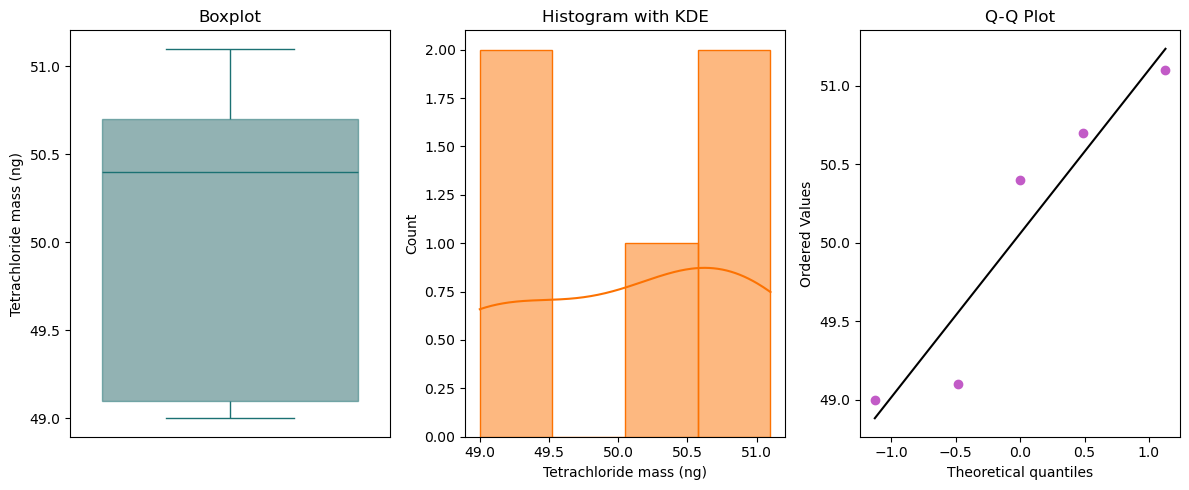

In [16]:
# Visualizing the experimental data using boxplot, histogram with KDE, and Q-Q plot
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y='CCl4_mass_ng', data=experiments_df, linecolor='#1b7173', color='#1b7173',  boxprops=dict(alpha=.5), ax=axes[0])
axes[0].set_xticks([])
axes[0].set_ylabel('Tetrachloride mass (ng)')
axes[0].set_title('Boxplot')

sns.histplot(x='CCl4_mass_ng', data=experiments_df, kde=True, color='#fc7202', edgecolor='#fc7202', ax=axes[1])
axes[1].set_xlabel('Tetrachloride mass (ng)')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram with KDE')

stats.probplot(experiments_df['CCl4_mass_ng'], dist="norm", plot=axes[2])
axes[2].get_lines()[0].set_markerfacecolor('#c25bc7')   # color of the points
axes[2].get_lines()[0].set_markeredgecolor('#c25bc7')
axes[2].get_lines()[1].set_color('black')             # color of the reference line
axes[2].set_title("Q-Q Plot")
plt.tight_layout()

In [ ]:
# Checking the normality assumption using the Shapiro–Wilk test
# Null hypothesis (H0): the data come from a normal distribution
statistic_SW, p_value_SW = stats.shapiro(experiments_df['CCl4_mass_ng'])
print(f'Shapiro-Wilk test statistic: {statistic_SW:.4f}, p-value: {p_value_SW:.4f}')

Shapiro-Wilk test statistic: 0.8695, p-value: 0.2642


Even though it is difficult to draw conclusions about the data distribution from only five data points, the Shapiro–Wilk test yields a *p*-value of 0.2642.\
With $α = 0.05$, we fail to reject the null hypothesis of normality.\
Therefore, we will proceed under the assumption of normality and perform a two-tailed one-sample *t*-test.

In [ ]:
# Performing a two-tailed one-sample t-test to check for systematic bias
# Null hypothesis (H0): the sample mean equals 50 ng (no systematic error)
t_statistic_two_tailed, p_value_two_tailed = ttest_1samp(experiments_df.CCl4_mass_ng, popmean=50, alternative='two-sided')
print(f't-statistic: {t_statistic_two_tailed:.4f}, p-value: {p_value_two_tailed:.4f}')

t-statistic: 0.1404, p-value: 0.8951


> The obtained *p*-value (0.8951) exceeds the 0.05 significance level, implying that the observed deviations from 50 ng can be attributed to random variation rather than systematic bias.

So far, we have compared a **sample mean** to a **known reference value** using the one-sample *t*-test.  
Next, we’ll see how to compare the **means of two groups** - using the **two-sample *t*-test**.

#### <font color="#fc7202">Task 4:</font>

Two methods for determining **chromium** concentrations in grass were applied to the **same samples**.  
Results (units consistent):

| Sample | Method 1 | Method 2 |
|:-----:|:--------:|:--------:|
| 1 | 1.79 | 2.01 |
| 2 | 1.74 | 2.81 |
| 3 | 1.41 | 2.34 |
| 4 | 1.29 | 2.12 |
| 5 | 1.15 | 2.39 |

Do the two methods give results with **means that differ significantly** at the 95% confidence level?

- **Null hypothesis ($H_0$):**  
  The two methods yield, on average, the same chromium concentration results.\
  <font color='#00bf63'>*$H_0\!:\,\mu_1 = \mu_2$*</font>

- **Alternative hypothesis ($H_1$):**  
  The two methods yield, on average, different chromium concentration results.\
  <font color='#00bf63'>*$H_1\!:\,\mu_1 \neq \mu_2$*</font> 

In [24]:
chromium_df = pd.DataFrame({'sample_id': np.arange(1, 6),
                            'method1': [1.79, 1.74, 1.41, 1.29, 1.15],
                            'method2': [2.01, 2.81, 2.34, 2.12, 2.39]})
chromium_df

,sample_id,method1,method2
0,1,1.79,2.01
1,2,1.74,2.81
2,3,1.41,2.34
3,4,1.29,2.12
4,5,1.15,2.39


C:\Users\IdaRahu\AppData\Local\Temp\ipykernel_126456\1793852091.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chromium_long, x='method', y='chromium', palette=[color_m1, color_m2], width=0.5, ax=axes[0, 0])


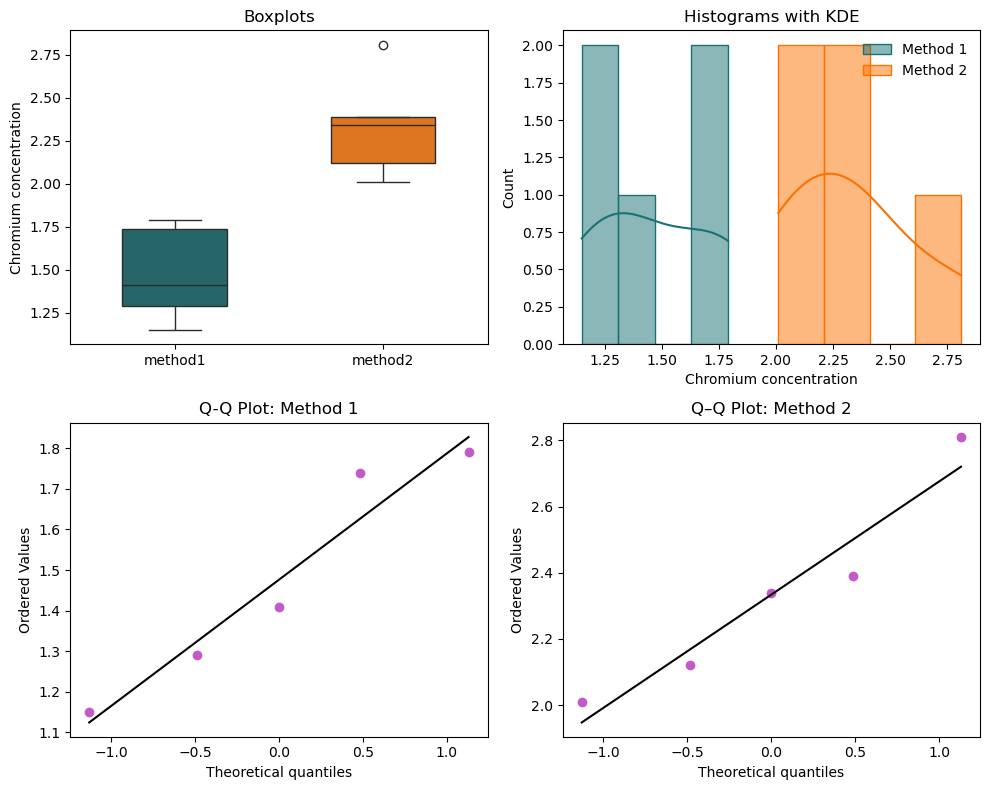

In [29]:
# Long format for the boxplot
chromium_long = chromium_df.melt(
    id_vars='sample_id',
    value_vars=['method1', 'method2'],
    var_name='method',
    value_name='chromium'
)

color_m1 = '#1b7173'   
color_m2 = '#fc7202'   
color_qq = '#c25bc7'   

# Createing subplot layout: 2 rows × 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=chromium_long, x='method', y='chromium', palette=[color_m1, color_m2], width=0.5, ax=axes[0, 0])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Chromium concentration')
axes[0, 0].set_title('Boxplots')

sns.histplot(chromium_df['method1'], bins='auto', kde=True, color=color_m1, alpha=0.5, edgecolor=color_m1, ax=axes[0, 1], label='Method 1')
sns.histplot(chromium_df['method2'], bins='auto', kde=True, color=color_m2, alpha=0.5, edgecolor=color_m2, ax=axes[0, 1], label='Method 2')
axes[0, 1].set_xlabel('Chromium concentration')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Histograms with KDE')
axes[0, 1].legend(frameon=False)

stats.probplot(chromium_df['method1'], dist="norm", plot=axes[1, 0])
axes[1, 0].get_lines()[0].set_markerfacecolor(color_qq)
axes[1, 0].get_lines()[0].set_markeredgecolor(color_qq)
axes[1, 0].get_lines()[1].set_color('black')
axes[1, 0].set_title('Q-Q Plot: Method 1')

stats.probplot(chromium_df['method2'], dist="norm", plot=axes[1, 1])
axes[1, 1].get_lines()[0].set_markerfacecolor(color_qq)
axes[1, 1].get_lines()[0].set_markeredgecolor(color_qq)
axes[1, 1].get_lines()[1].set_color('black')
axes[1, 1].set_title('Q–Q Plot: Method 2')

plt.tight_layout()

In [32]:
''' Before comparing the two methods statistically, we first need to verify whether each sample  (Method 1 and Method 2) follows a normal distribution.  
We use the Shapiro–Wilk test, where the null hypothesis states that the data come from a normal distribution.'''
statistic_SW_method1, p_value_SW_method1 = stats.shapiro(chromium_df.method1)
statistic_SW_method2, p_value_SW_method2 = stats.shapiro(chromium_df.method2)

print(f'Method 1 - Shapiro-Wilk test statistic: {statistic_SW_method1:.4f}, p-value: {p_value_SW_method1:.4f}')
print(f'Method 2 - Shapiro-Wilk test statistic: {statistic_SW_method2:.4f}, p-value: {p_value_SW_method2:.4f}')

Method 1 - Shapiro-Wilk test statistic: 0.9095, p-value: 0.4644
Method 2 - Shapiro-Wilk test statistic: 0.9363, p-value: 0.6396


> Both methods have *p*-values well above 0.05 (method 1: 0.4644; method 2: 0.6396), so we fail to reject the null hypothesis and assume that both datasets are normally distributed.\
> This means we can proceed with a *t*-test.
>
> However, before performing the *t*-test, we should also check whether the **variances of the two samples are equal**.\
> A standard approach for this is the ***F*-test** (which we’ll learn and use next time), but for now, we’ll **proceed under the assumption of equal variances**.\
> Therefore, we will continue with an independent two-sample, two-tailed *t*-test, using the `scipy.stats.ttest_ind()` function.

In [34]:
t_statistic_two_tailed, p_value_two_tailed = ttest_ind(chromium_df.method1, chromium_df.method2, equal_var=True, alternative='two-sided')
print(f't-statistic: {t_statistic_two_tailed:.4f}, p-value: {p_value_two_tailed:.4f}')

t-statistic: -4.6059, p-value: 0.0017


> The obtained *p*-value (0.0017) is well below the 0.05 significance level, providing strong evidence against the null hypothesis.\
> Therefore, we reject the null hypothesis, and conclude that the two analytical methods yield significantly different mean chromium concentrations.